# Lecture 03: Naive Bayes, LDA, and Logistic Regression

In [36]:
#Load Packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from scipy import linalg

from sklearn.naive_bayes import GaussianNB
from sklearn.lda import LDA
from sklearn import linear_model

%matplotlib inline

#Load Data
data = np.loadtxt('/vagrant/shared_files/data/seeds_dataset.txt')
x = data[:,[0,2]]
y = data[:,-1]

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
labels=['sr','og','^b']
colors=['r','g','b']

#Define classifier plotting function
def plot_classifier(x,y,clf,title):

    #Prepare grid for plotting decision surface
    gx1, gx2 = np.meshgrid(np.arange(min(x[:,0]), max(x[:,0]),(max(x[:,0])-min(x[:,0]))/200.0 ),
                         np.arange(min(x[:,1]), max(x[:,1]),(max(x[:,1])-min(x[:,1]))/200.0))
    gx1l = gx1.flatten()
    gx2l = gx2.flatten()
    gx   = np.vstack((gx1l,gx2l)).T

    #Compute a prediction for every point in the grid
    gyhat = clf.predict(gx)
    gyhat = gyhat.reshape(gx1.shape)

    #Plot the results
    for i in [1,2,3]:
      plt.plot(x[y==i,0],x[y==i,1],labels[i-1]);
    plt.xlabel('area');
    plt.ylabel('compactness');
    plt.pcolormesh(gx1,gx2,gyhat,cmap=cmap_light)
    plt.colorbar();
    plt.axis('tight');
    plt.title(title);

#Define data plotting function
def plot_data(x,y,title):
    #Plot the results
    for i in [1,2,3]:
      plt.plot(x[y==i,0],x[y==i,1],labels[i-1]);
    plt.colorbar();
    plt.axis('tight');
    plt.xlabel('area');
    plt.ylabel('compactness');
    plt.title(title);    
    
#Define ellipse plotting function    
def plot_ellipse(mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = matplotlib.patches.Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5,
                              180 + angle, color=color)
    ell.set_clip_box(plt.gca().bbox)
    ell.set_alpha(0.5)
    plt.gca().add_artist(ell)


## Naive Bayes

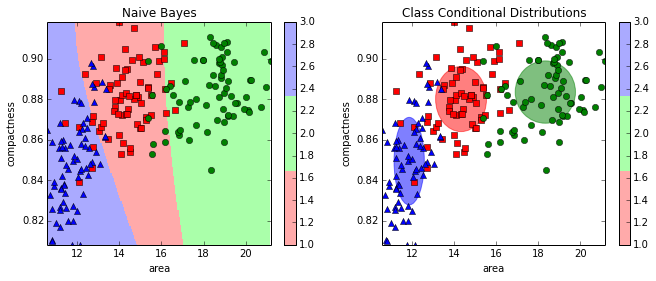

In [37]:
#Fit the specified classifier
clf = GaussianNB()
clf.fit(x, y)

plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
plot_classifier(x,y,clf,'Naive Bayes')

#Plot the class conditional densities
plt.subplot(1,2,2)
plot_data(x,y,'Class Conditional Distributions')
for i in range(3):
    mu = clf.theta_[i,:]
    Sigma = np.diag(clf.sigma_[i,:])
    plot_ellipse(mu,Sigma,colors[i])
    


# LDA

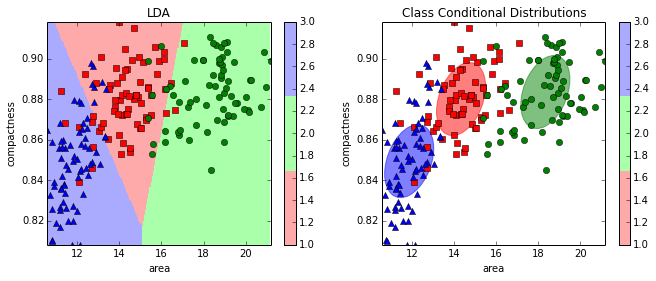

In [38]:
clf = LDA()
clf.fit(x, y, store_covariance=True)

plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
plot_classifier(x,y,clf,'LDA')

#Plot the class conditional densities
plt.subplot(1,2,2)
plot_data(x,y,'Class Conditional Distributions')
for i in range(3):
    mu = clf.means_[i,:]
    Sigma = clf.covariance_
    plot_ellipse(mu,Sigma,colors[i])

# Logisitc Regression

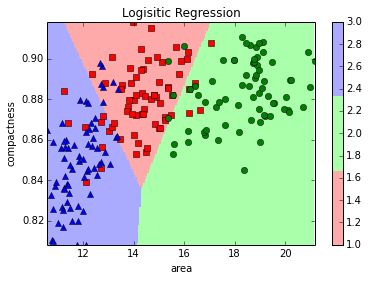

In [39]:
clf = linear_model.LogisticRegression(C=1000)
clf.fit(x, y)
plot_classifier(x,y,clf,'Logisitic Regression')